In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
from typing import Mapping, Sequence
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

In [67]:
adata = sc.read('bkknn_corrected_young')

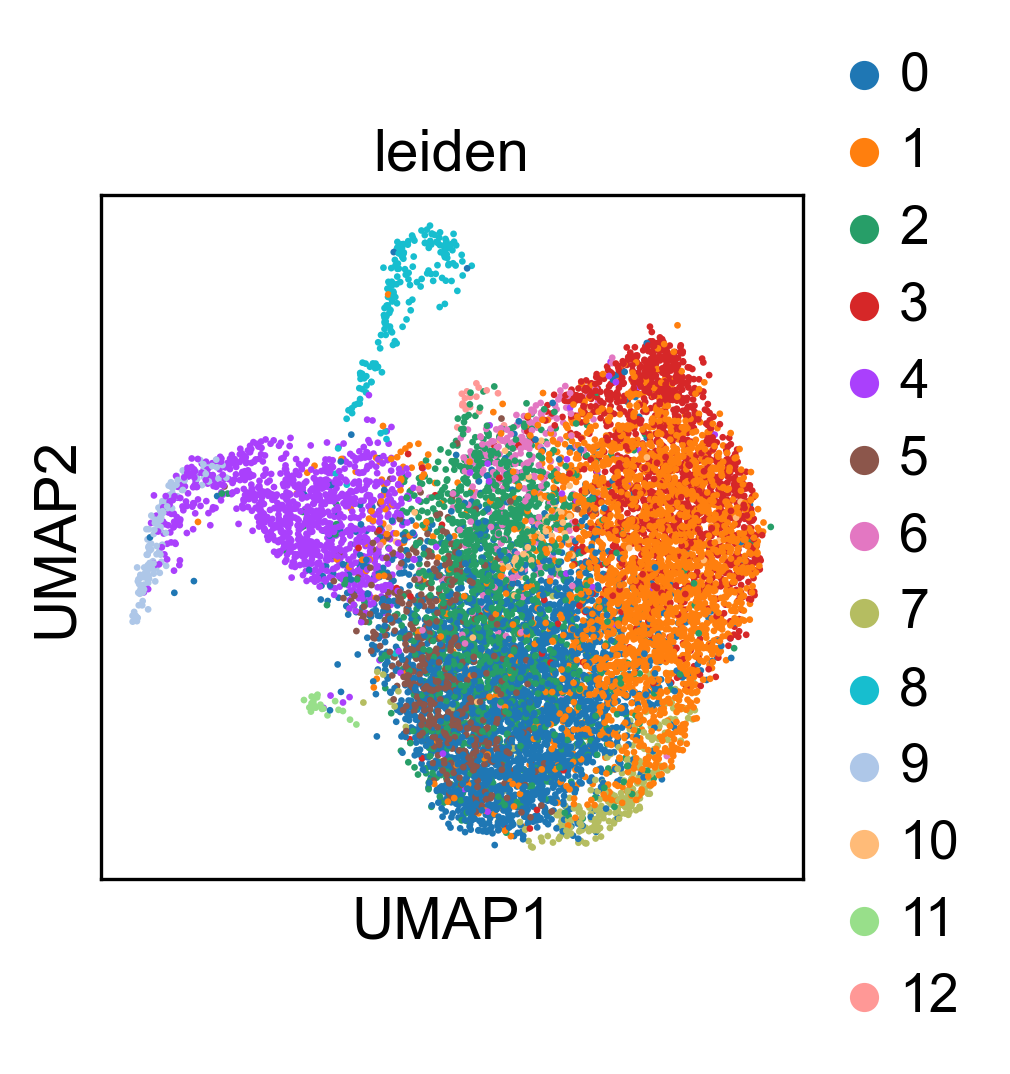

In [68]:
sc.pl.umap(adata, color=['leiden'])

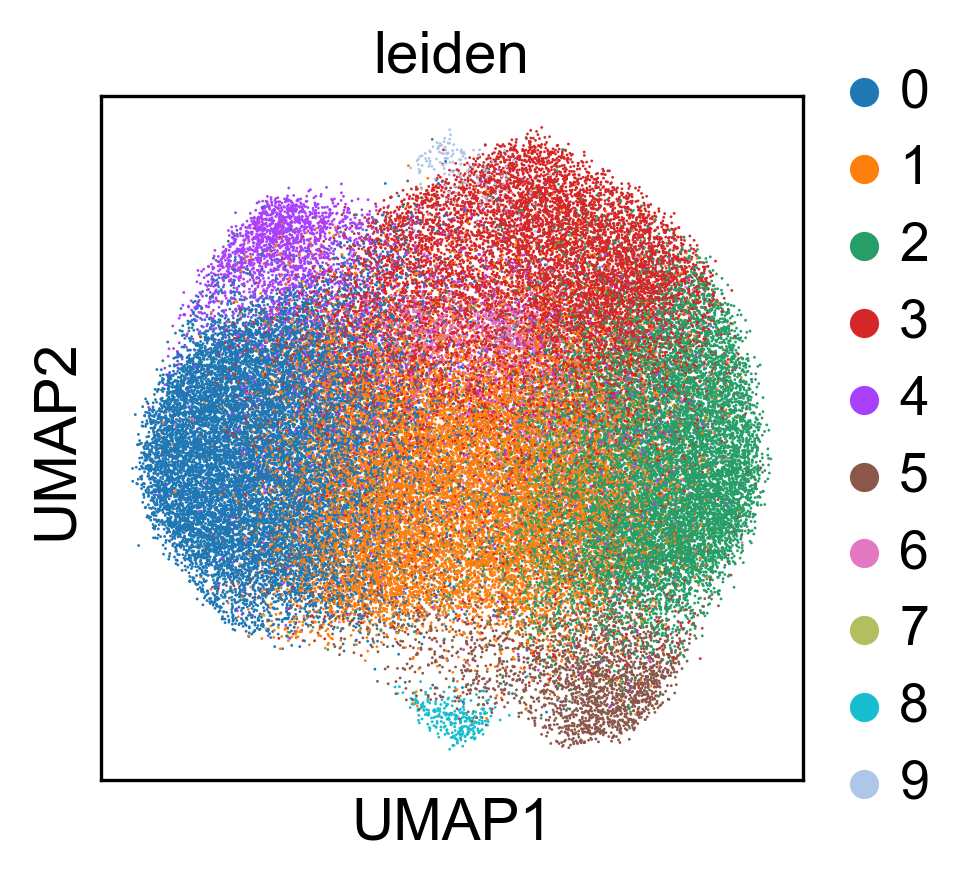

In [7]:
sc.settings.set_figure_params(dpi=300, frameon=True, figsize=(3, 3), facecolor='white')
sc.pl.umap(adata, color=['leiden'], save='bkkn_aged.pdf')

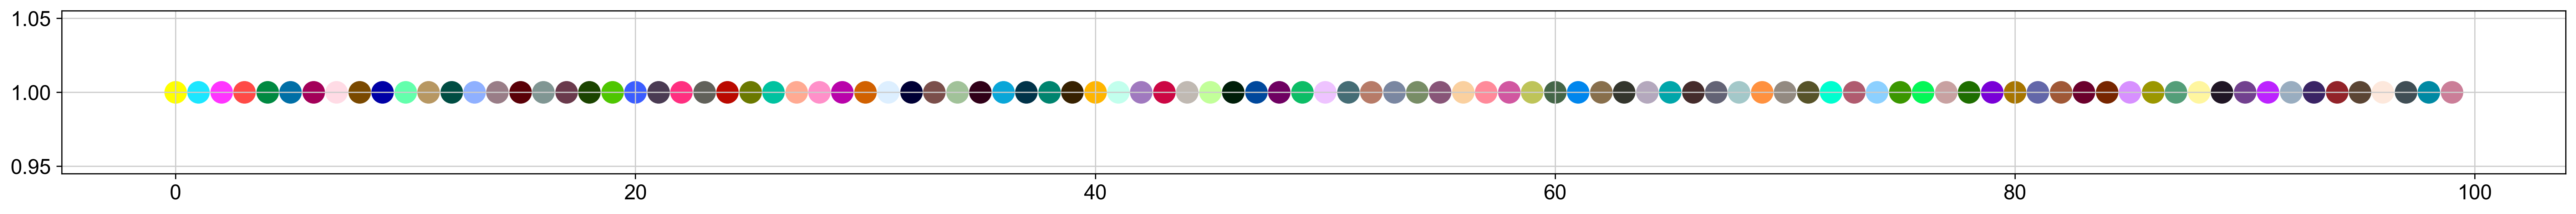

In [9]:
import matplotlib.pyplot as pl
pl.figure(figsize=(30, 2))
for i in range(100):
    pl.scatter(i, 1, c=sc.pl.palettes.godsnot_102[i], s=200)#or zeileis_28 or
pl.show()

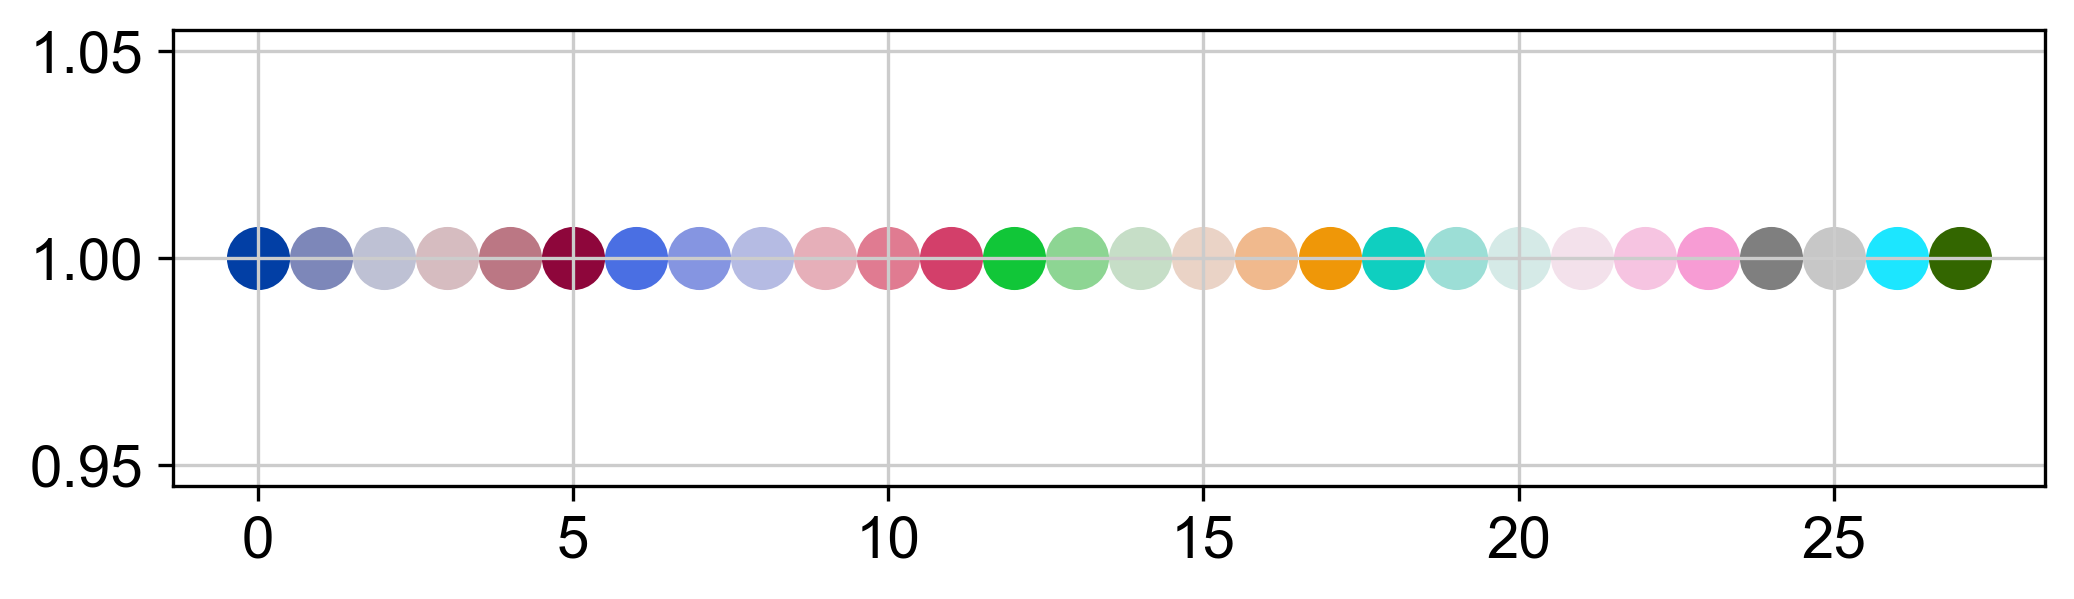

In [10]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [11]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(adata.uns['sample_colors'])

In [12]:
new_colors[[0]] = zeileis_colors[[0]]
new_colors[[1]] = zeileis_colors[[18]]
new_colors[[2]] = zeileis_colors[[17]]


In [13]:
adata.uns['sample_colors'] = new_colors

In [14]:
sc.pl.umap(adata, color=['sample'])

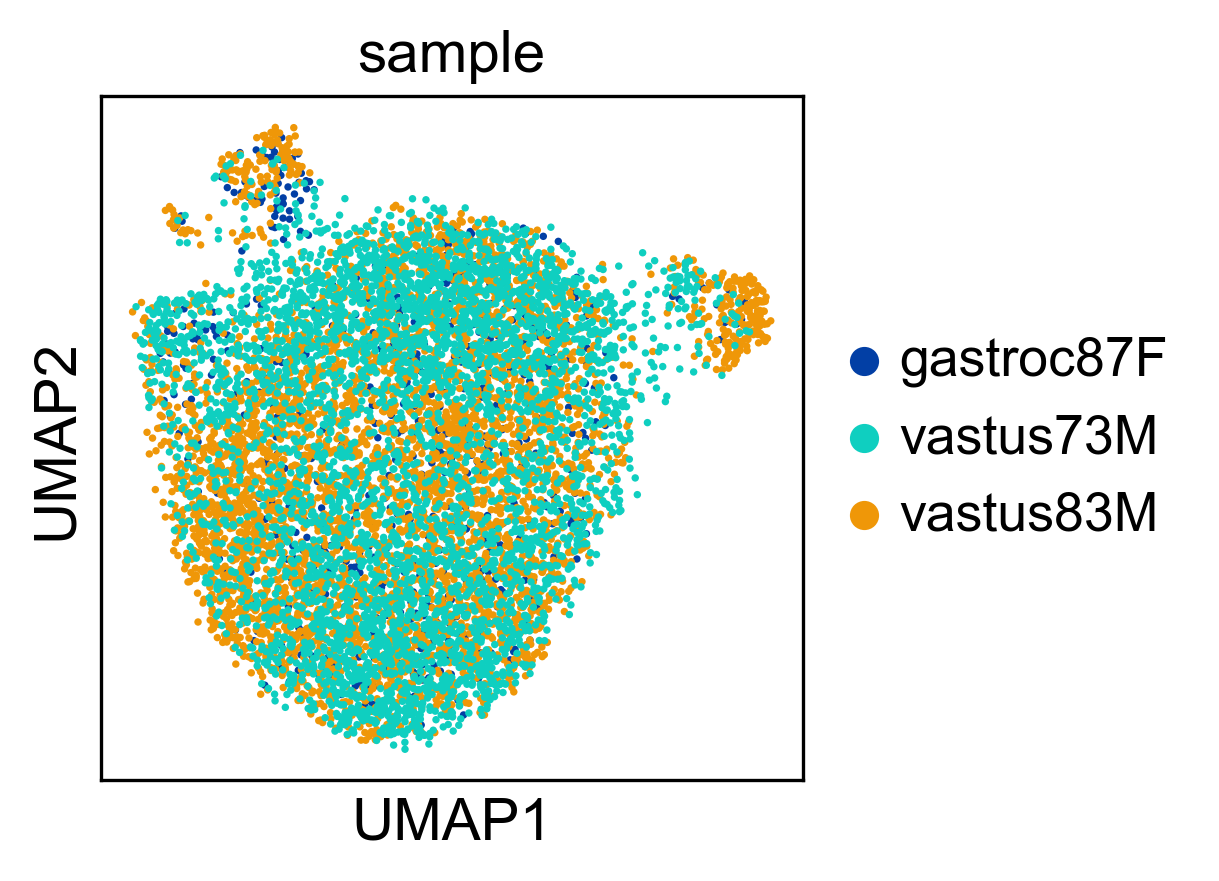

In [15]:
sc.settings.set_figure_params(dpi=300, frameon=True, figsize=(3, 3), facecolor='white')
sc.pl.umap(adata, color=['sample'], save='bkkn_agedt_sample.pdf')

In [16]:
adata.obs['sample'].value_counts()

vastus83M     4566
vastus73M     4156
gastroc87F     685
Name: sample, dtype: int64

In [38]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

In [39]:
legend_loc='on data'

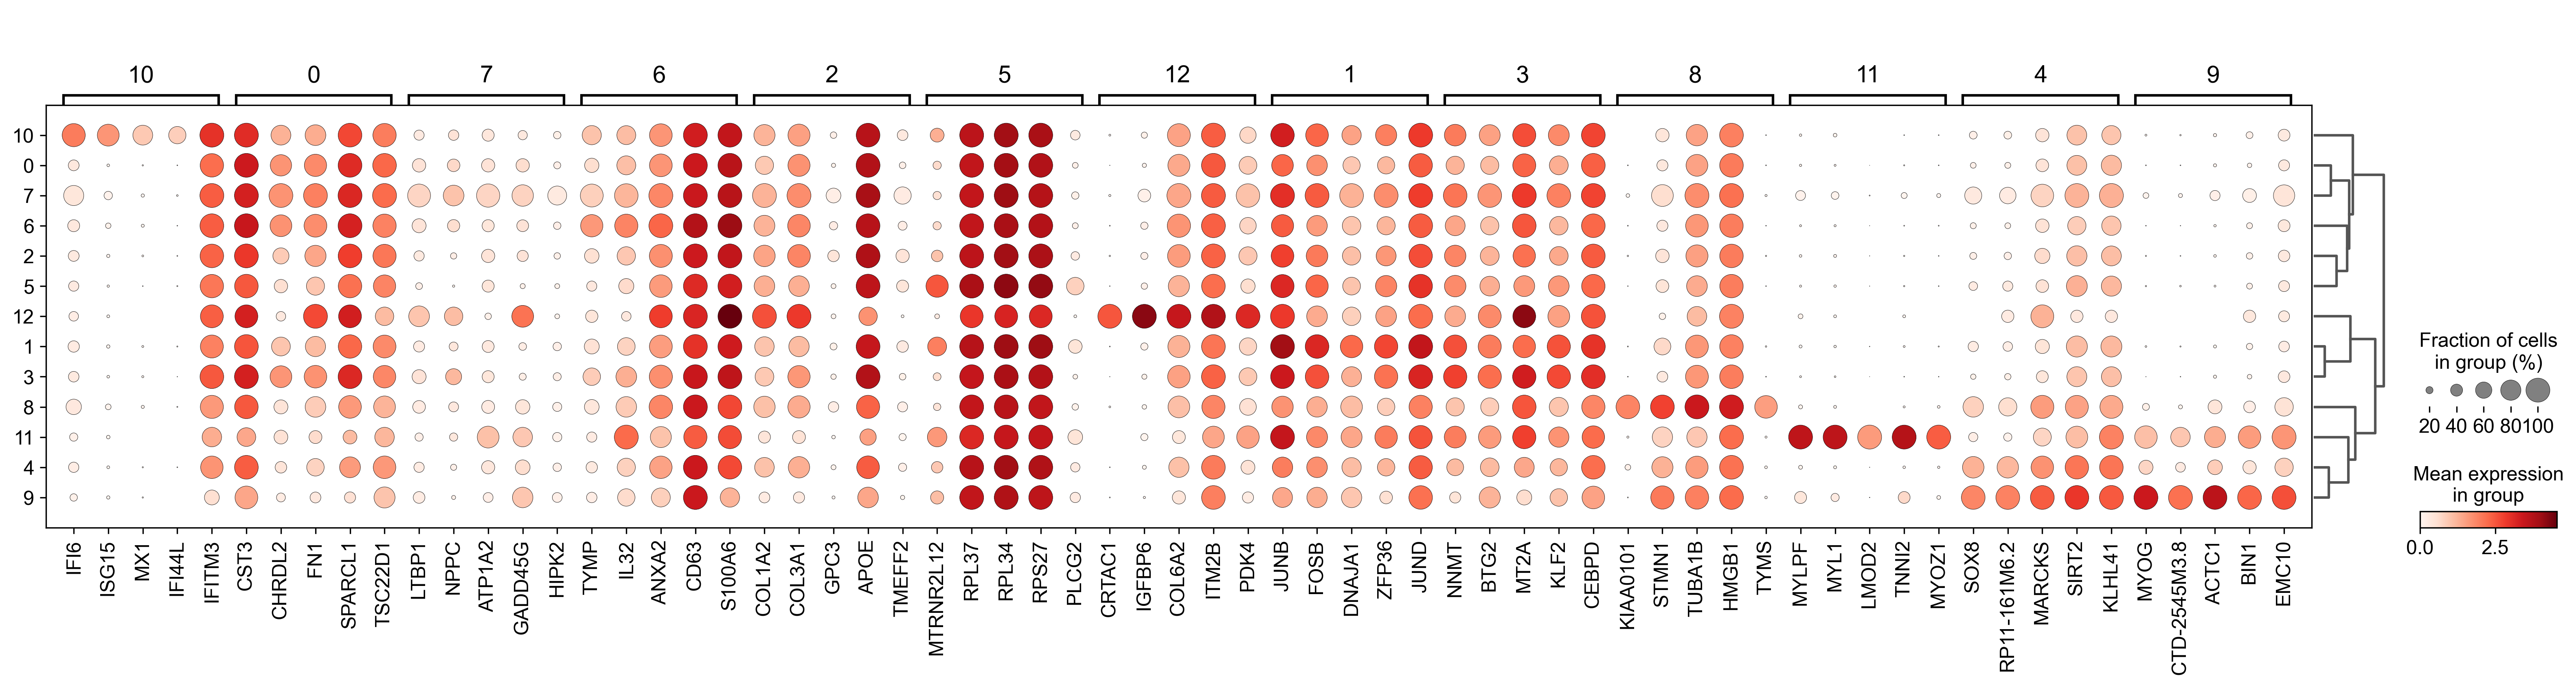

In [41]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)

In [60]:
marker_genes_aged = {
    'Myogenesis': ['PAX3', 'PAX7', 'SOX8', 'MYOD1', 'MYOG', 'MYH2'],
    'Cycling Genes': ['TOP2A', 'PCNA', 'CCND1', 'CDKN1C', 'CDKN2A'],
    'Stemness Genes': ['HEY1', 'SPRY1'],
    'HuMuSCs Cluster Markers': ['FOS', 'EGR1', 'SPARCL1', 'LMNA','RPS21', 'RPL37A', 'HSPA1A', 'JUN', 'VIM', 'CAV1', 'DES',
                               'TNNC2', 'MYL9', 'IGFBP7', 'KRT17', 'DLK1', 'DCN', 'IGFBP6', 'ITM2B', 'LPL']
}

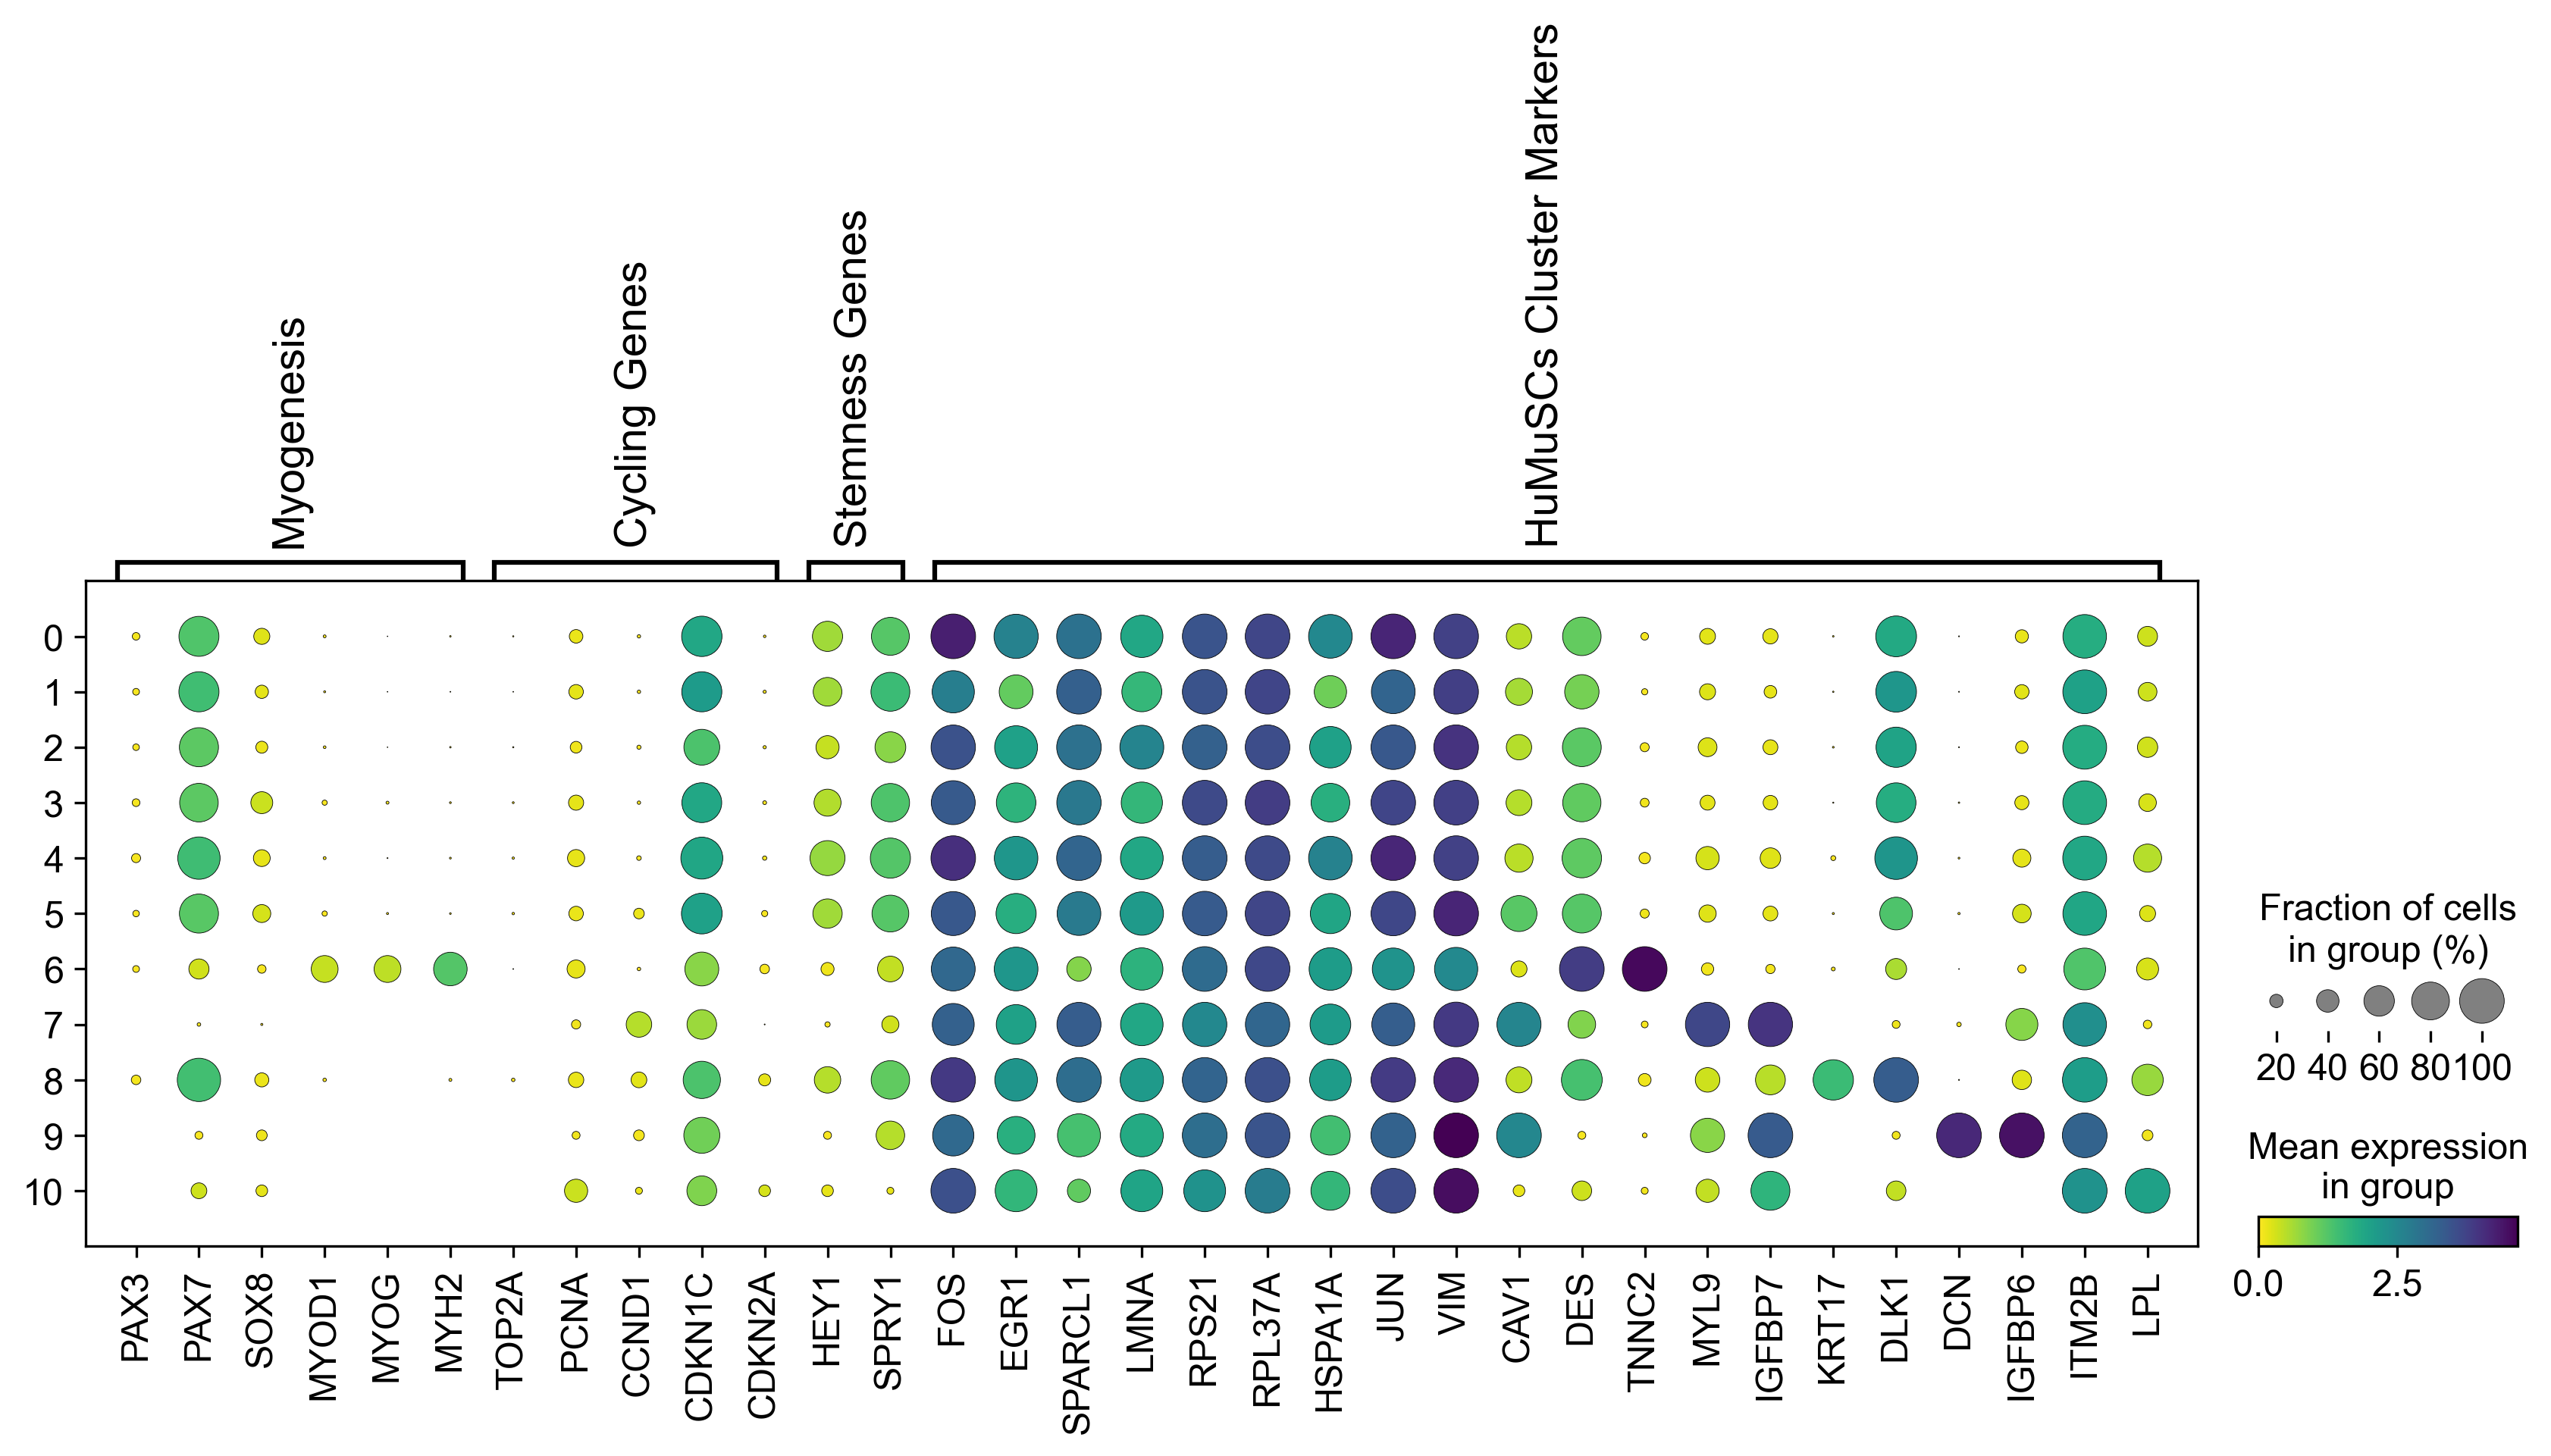

In [61]:
sc.pl.dotplot(adata, marker_genes_aged, 'leiden', dendrogram=False
, cmap='viridis_r', save = 'dotplot_aged')

In [64]:
marker_genes_aged = {
    'Myogenesis': ['PAX3', 'PAX7', 'SOX8', 'MYOD1', 'MYOG', 'MYH2'],
    'Cycling Genes': ['TOP2A', 'PCNA', 'CCND1', 'CDKN1C', 'CDKN2A'],
    'Stemness Genes': ['HEY1', 'SPRY1'], 
    'HuMuSCs Cluster Markers': ['JUND', 'JUNB', 'HSPA1A', 'JUN','RPL35', 'CD63', 'VIM', 'S100A4', 'SOD2', 'IRF1', 'NEB',
                               'MARCKS', 'MX1', 'ISG15', 'IGFN1', 'GPX3', 'TNNT3', 'MYL1', 'IGFBP7', 'TMSB4X']
}

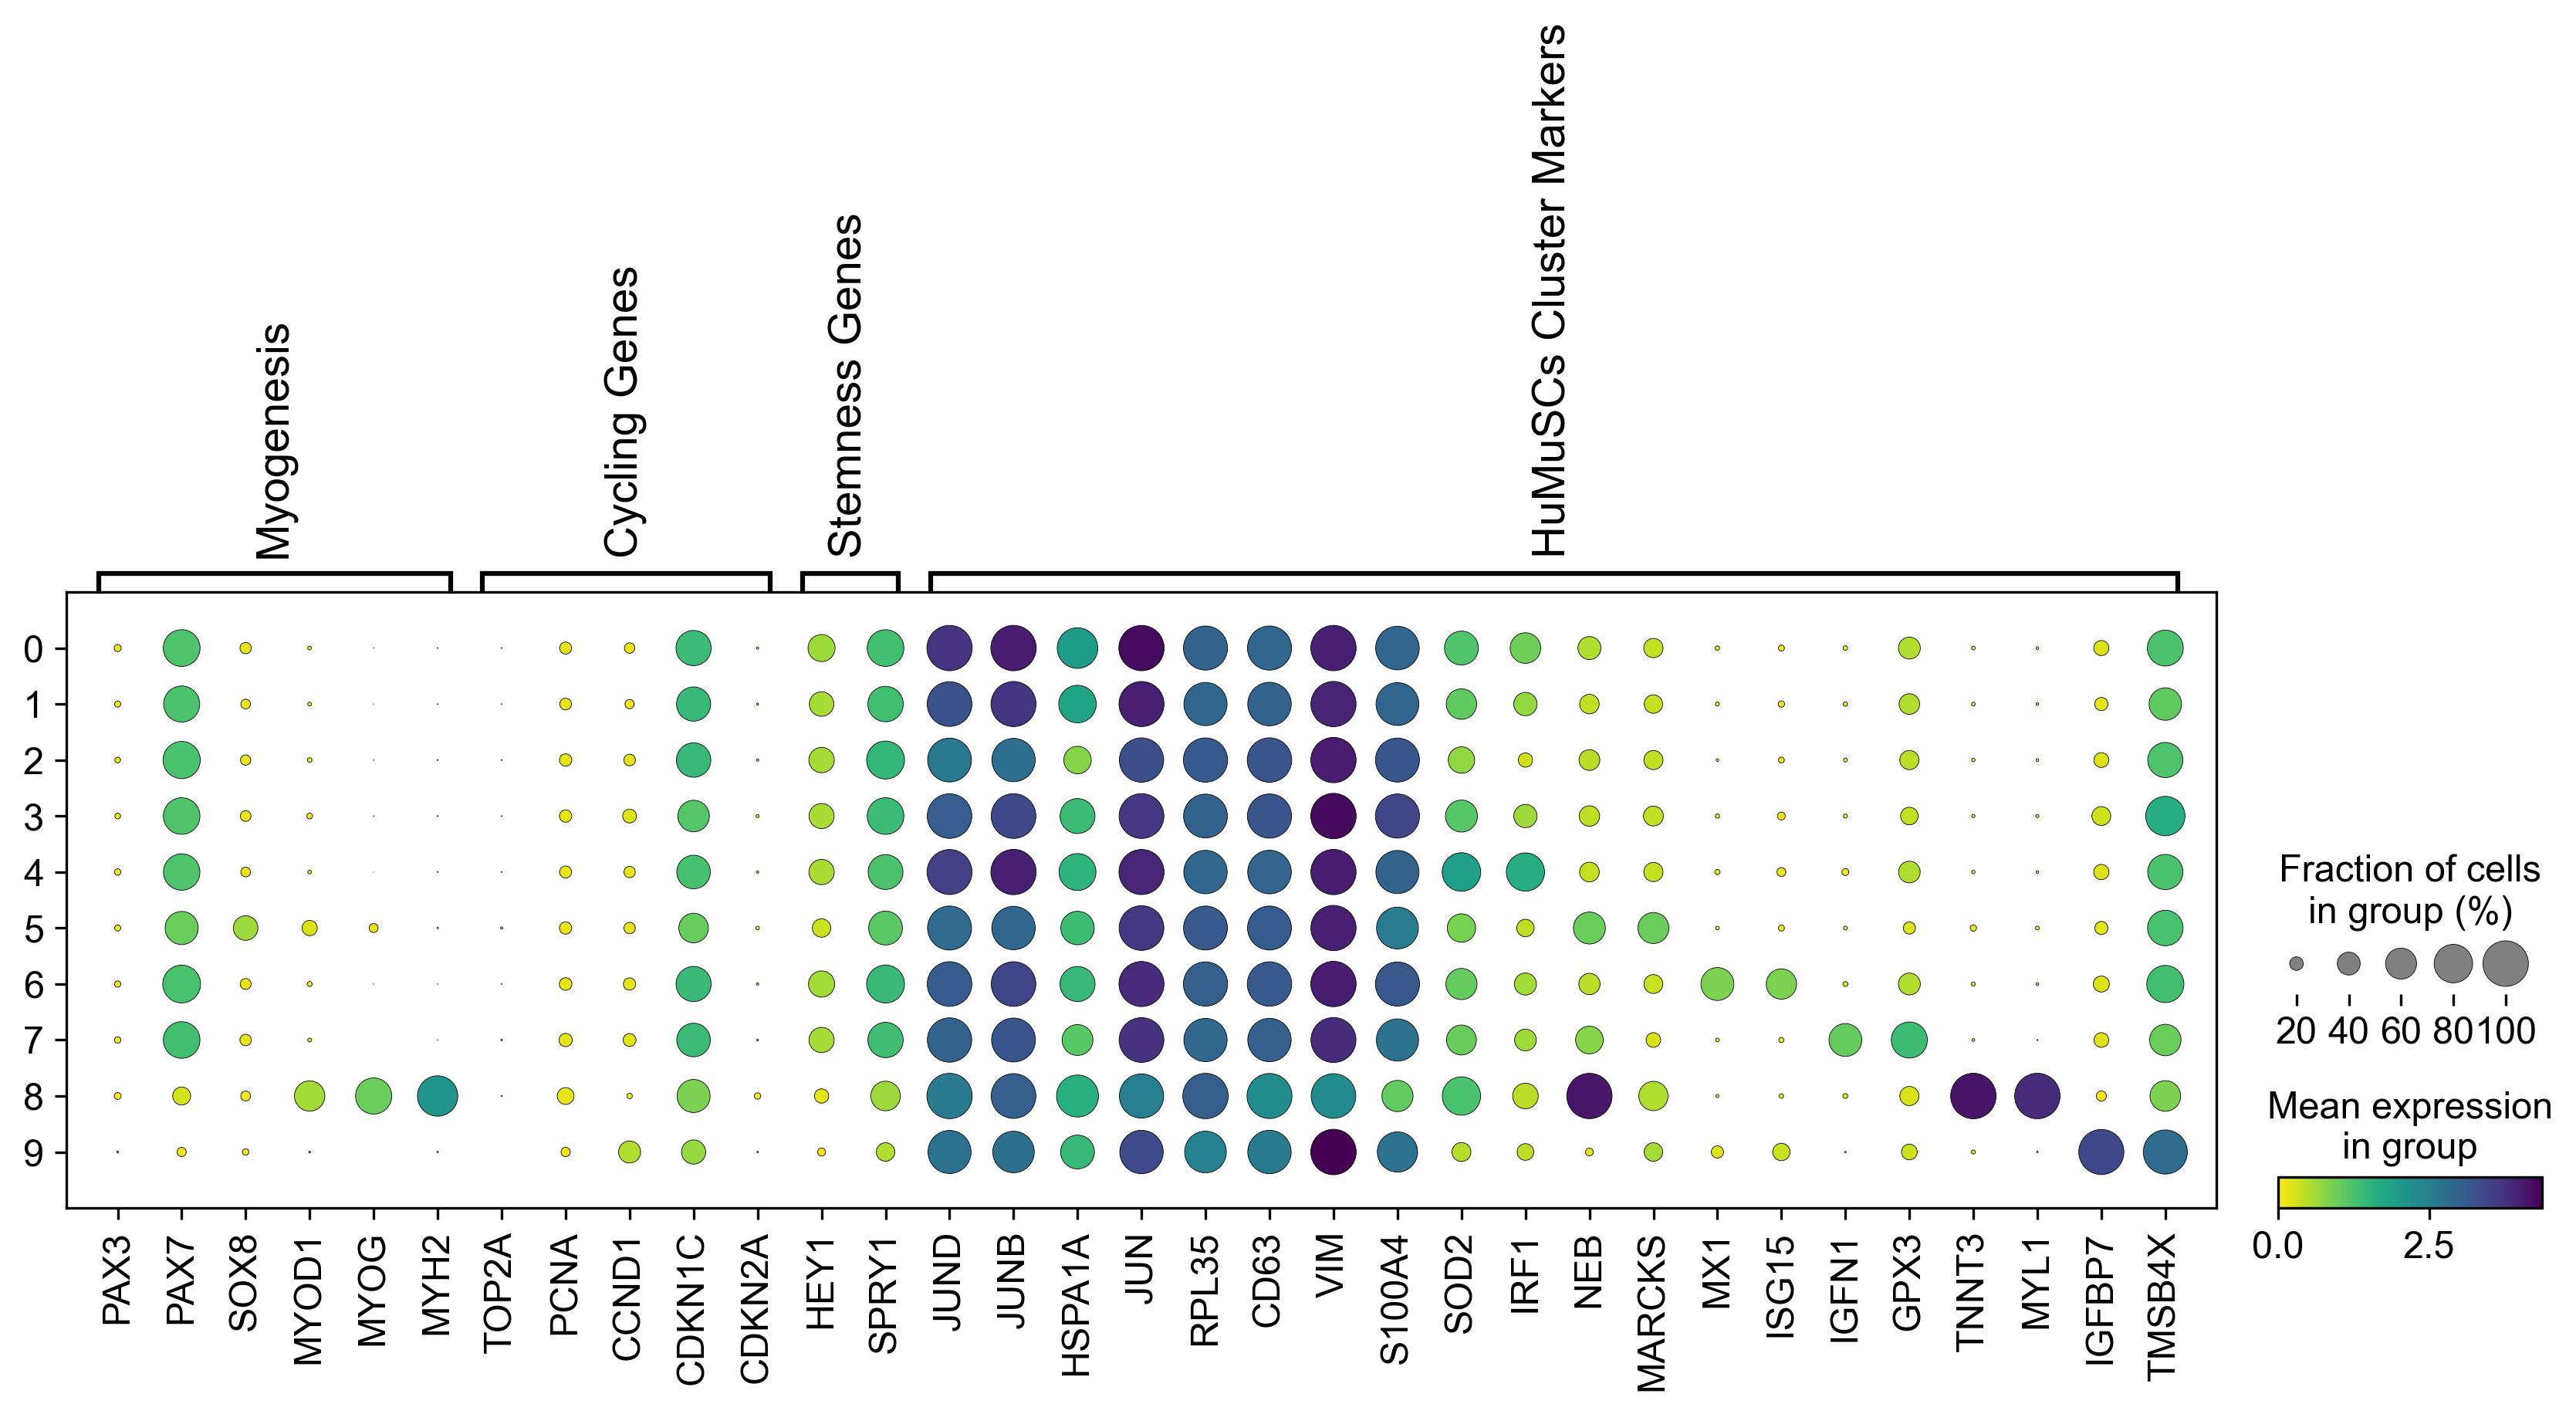

In [65]:
sc.pl.dotplot(adata, marker_genes_aged, 'leiden', dendrogram=False
, cmap='viridis_r', save = 'dotplot_adult')

In [73]:
marker_genes_young = {
    'Myogenesis': ['PAX3', 'PAX7', 'SOX8', 'MYOD1', 'MYOG', 'MYH2'],
    'Cycling Genes': ['TOP2A', 'PCNA', 'CCND1', 'CDKN1C', 'CDKN2A'],
    'Stemness Genes': ['HEY1', 'SPRY1'],
    'HuMuSCs Cluster Markers': ['SPARCL1', 'JUNB', 'FOSB','COL1A2', 'COL3A1', 'KLF2', 'NNMT', 'MARCKS', 'RPL37', 'RPL34', 'TYMP', 'NPPC', 'STMN1',
                               'ACTC1', 'MX1', 'ISG15', 'MYL1', 'TNNT3', 'IGFBP6', 'ITM2B']
}

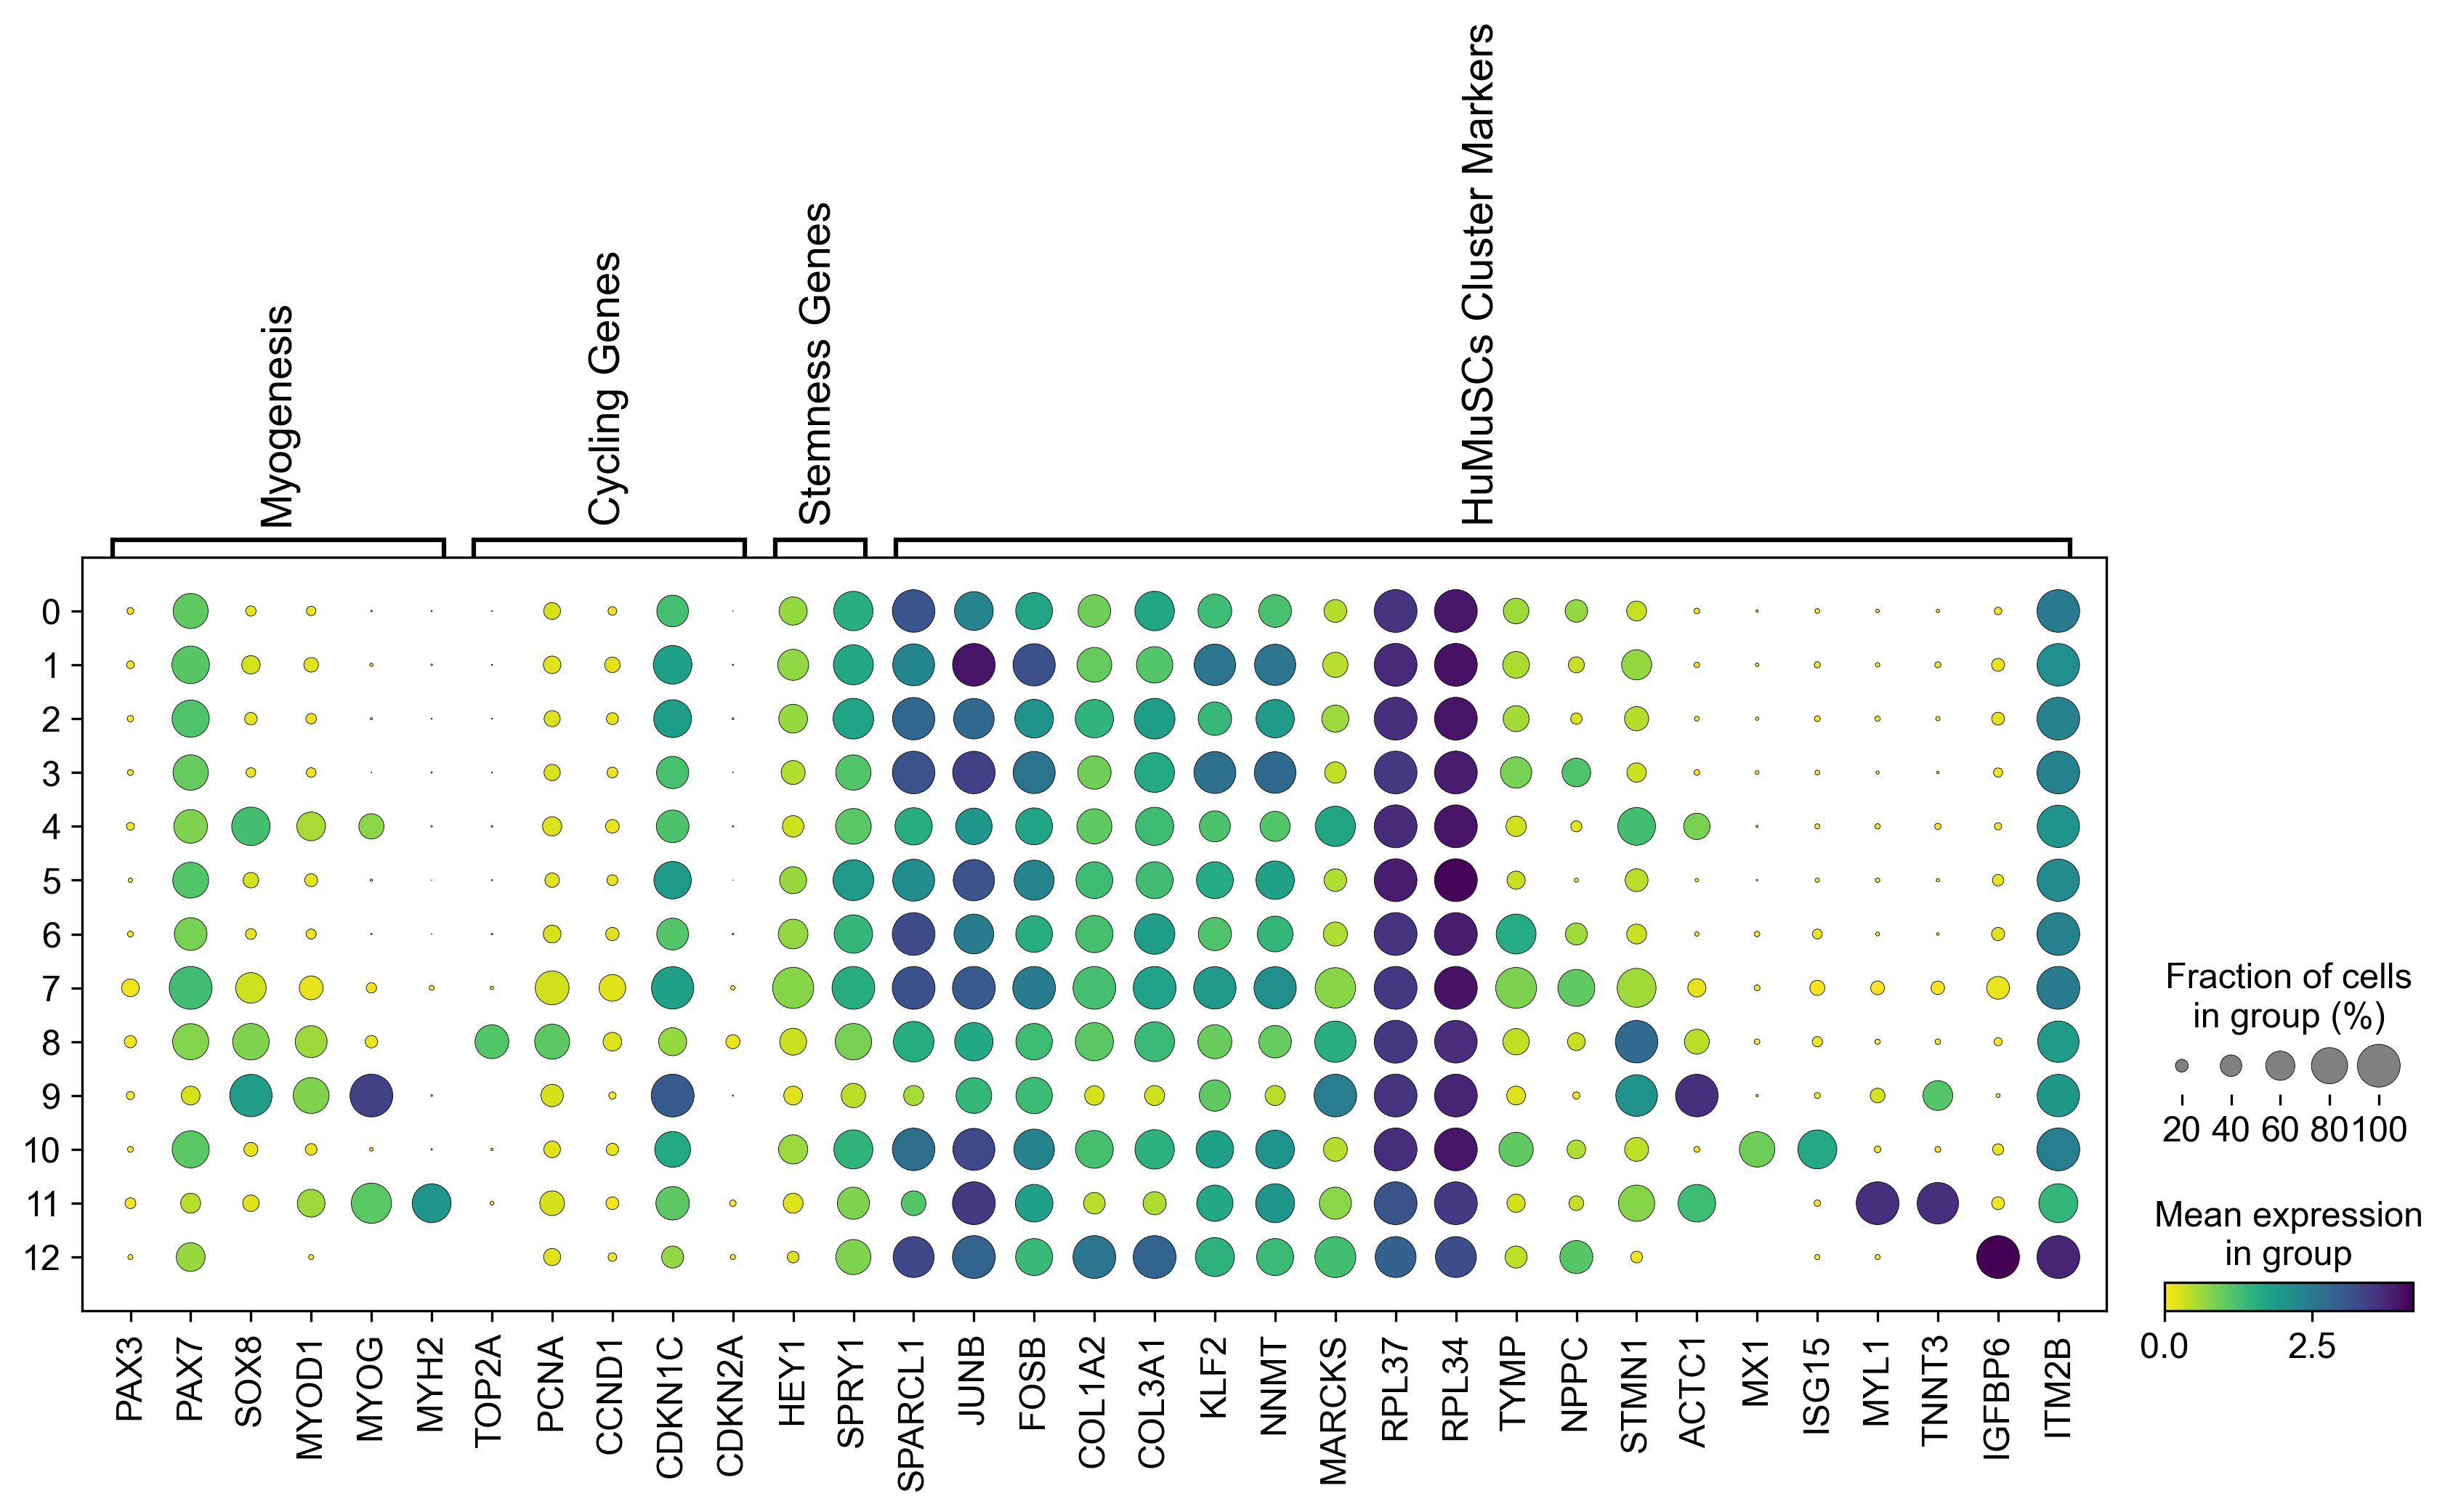

In [74]:
sc.pl.dotplot(adata, marker_genes_young, 'leiden', dendrogram=False
, cmap='viridis_r', save = 'dotplot_young')